Pasul 1: determinarea H

centers = lista cu centrele de rotatie (lista de tupluri)
D = distanta dintre primul centru de rotatie si ultimul

Config initiala - (x0, y0, fi0)
Config finala - (x1, y1, fi1)

Punem punctele (x0, y0) si (x1, y1) pe grafic
Trasez doua drepte de lungime 2:
- prima perpendiculara pe directia lui fi0 cu mijlocul in (x0,y0)
- a doua perpendiculara pe directia lui fi1 cu mijlocul in (x1, y1)

Capetele primei drepte vor fi centrele de rotatie initiale si captele dreptei 2 vor fi centrele de rotatie finale.
Trasez distantele din centrele de rotatie initiale pana in centrele de rotatie finale.
D = va fi minimul dintre distante.
N (nr de centre de rotatie va fi) = ceil(D)

In [21]:
from math import sin, cos, pi, radians, sqrt, ceil, floor, asin, degrees
from matplotlib import pyplot as plt

Initial, pornim cu configuratia de start (pozitia si directia) si cu configuratia finala (pozitia si directia).

Functia coordEdges ne va da pozitiile centrelor de rotatie (left si right, initiale si finale) in functie de configuratii. 

In [22]:
def coordEdges(conf, L):
    x, y, fi = conf
    r1 = []
    r2 = []

    r1.append(x + L/2 * sin(fi))
    r1.append(y - L/2 * cos(fi))
    r2.append(x - L/2 * sin(fi))
    r2.append(y + L/2 * cos(fi))
    return r1, r2

Cu pozitiile centrelor de rotatie, vom calcula distanta D, care este distanta minima dintre centrele de rotatie initiale si finale

In [23]:
def getD(first, second):
    x1 = first[0][0]
    y1 = first[0][1]
    x2 = second[0][0]
    y2 = second[0][1]
    dist1 = sqrt((x2 - x1)*2 + (y2 - y1)*2)
    x1 = first[1][0]
    y1 = first[1][1]
    x2 = second[1][0]
    y2 = second[1][1]
    dist2 = sqrt((x2 - x1)*2 + (y2 - y1)*2)

    if dist1 > dist2:
        return dist2, 1
    else:
        return dist1, 0

Stiind D, vom putea calcula cate centre de rotatie exista in total pe traseul bancii

In continuare, vom calcula H.

In [24]:
def get_H(n, d):
    if n % 2 == 0:
        helper = (d * 2) / (4 * ((d - 1) * 2))
    else:
        helper = (d ** 2 - 4) / (4 * d * (d - 2))
    return sqrt(1 - helper)

Stiind H, vom putea calcula unghiul de rotatie al bancii (beta), care este arcsinus de H.

Prin unghiul de rotatie, vom putea calcula in continuare urmatoarea pozitie a noului centru de rotatie.

Functia getNextPosition ne va da coordonatele urmatorului centru de rotatie.

In [25]:
def getNextPosition(rotateCenter, orientation, h):
    beta1 = degrees(asin(h))

    angle = 180 - degrees(orientation) - beta1
    nextX = rotateCenter[0] + cos(radians(angle)) * L
    nextY = rotateCenter[1] + sin(radians(angle)) * L
    print('NextX:', nextX, 'NextY:', nextY)
    return nextX, nextY

In continuare, voi printa configuratiile initiale si finale (mijlocul bancii). Pe langa acestea, se vor afisa si pozitiile tuturor centrelor de rotatie pana in configuratia finala.

In [38]:
initialConf = [-3, -3, radians(45)]
finalConf = [0, 0, radians(0)]
L = 2

initialState = coordEdges(initialConf, L)
finalState = coordEdges(finalConf, L)
print('InitialState:', initialState, 'FinalState:', finalState)

centers_x_init = [initialState[0][0], initialState[1][0]]
centers_y_init = [initialState[0][1], initialState[1][1]]

centers_x_fin = [finalState[0][0], finalState[1][0]]
centers_y_fin = [finalState[0][1], finalState[1][1]]

D, index = getD(initialState, finalState)
N = floor(D)

next_x_list = []
next_y_list = []

for i in range(N):
    D, index = getD(initialState, finalState)
    H = get_H(N, D)
    nextX, nextY = getNextPosition(initialState[index], initialConf[2], H)
    next_x_list.append(nextX)
    next_y_list.append(nextY)
    if index == 0:
        initialState[1][0] = nextX
        initialState[1][1] = nextY
    else:
        initialState[0][0] = nextX
        initialState[0][1] = nextY

InitialState: ([-2.2928932188134525, -3.7071067811865475], [-3.7071067811865475, -2.2928932188134525]) FinalState: ([0.0, -1.0], [0.0, 1.0])
NextX: -2.108333488778827 NextY: -1.7156405610237384
NextX: -1.9295635193660419 NextY: 0.27635374068401286
NextX: -2.3114926868605465 NextY: 2.239547595354752


Urmeaza un grafic initial, in care sunt adaugate coordonatele din configuratia initiala, respectiv finala (CU ROSU)

Cu x sunt pozitiile centrelor de rotatie initiale, respectiv finale.

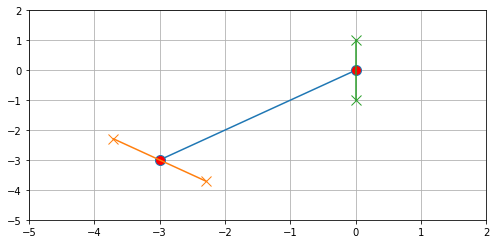

In [39]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

x = [-3, 0]
y = [-3, 0]

plt.xlim(-5, 2)
plt.ylim(-5, 2)
plt.grid()
plt.plot(x, y, marker="o", markersize=10, markerfacecolor="red")
plt.plot(centers_x_init, centers_y_init, marker="x", markersize=10, markerfacecolor="green")
plt.plot(centers_x_fin, centers_y_fin, marker="x", markersize=10, markerfacecolor="green")

plt.show()

Graficul de mai jos prezinta toate punctele centrelor de rotatie calculate de algoritmul nostru.

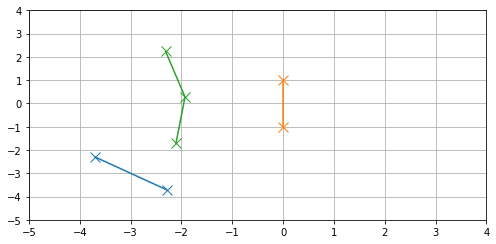

In [41]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

x = [-3, 0]
y = [-3, 0]

plt.xlim(-5, 4)
plt.ylim(-5, 4)
plt.grid()
plt.plot(centers_x_init, centers_y_init, marker="x", markersize=10, markerfacecolor="green")
plt.plot(centers_x_fin, centers_y_fin, marker="x", markersize=10, markerfacecolor="green")
plt.plot(next_x_list, next_y_list, marker="x", markersize=10, markerfacecolor="green")


plt.show()

Concluzie: Algoritmul nu functioneaza complet bine, din cauza unghiului de rotatie beta. Nu am reusit sa potrivim unghiul in cadranul potrivit (asin(H), pi - asin(H), pi + asin(H), 2pi - asin(H))

